Name : Kunal Mody

Batch : DS2312

### Avocado Project
##### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

###### Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
df =pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [38]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [39]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [40]:
df.shape

(18249, 14)

In [41]:
# we have got 18249 entries in 14 columns

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [43]:
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [45]:
# we have no null values in our dataset, below is heatmap presentation for the same

<Axes: >

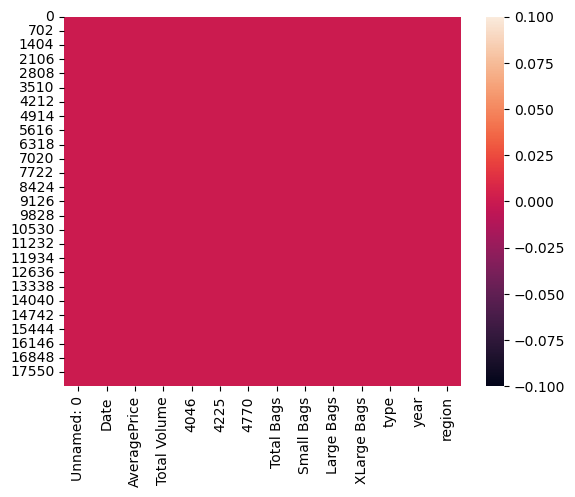

In [46]:
sns.heatmap(df.isnull())

In [47]:
# checking for unique values
df.nunique().to_frame('Total Unique values')

,Total Unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


In [48]:
# we can see that we have 2 unique values in 'type'

In [49]:
for i in df.columns:
    print(df[i].value_counts(), '\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64 

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64 

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64 

4103.97       2
352

In [50]:
# we can see that we have only 2 types of avocado present (1) conventional - 9126 & (2) organic- 9123
# as well data is available for 4 years (1) 2017 (2) 2016 (3) 2015 (4)2018

In [54]:
# column 'Unnamed: 0' and 'Date' has no importance to our dataset so we will drop it

In [56]:
# As well date column is not required  so we will drop it 
df = df.drop(columns =['Unnamed: 0','Date'], axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [60]:
# so now we have 18249 entries/row in 12 columns
# checking for corr() values in dataset

In [61]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<Axes: >

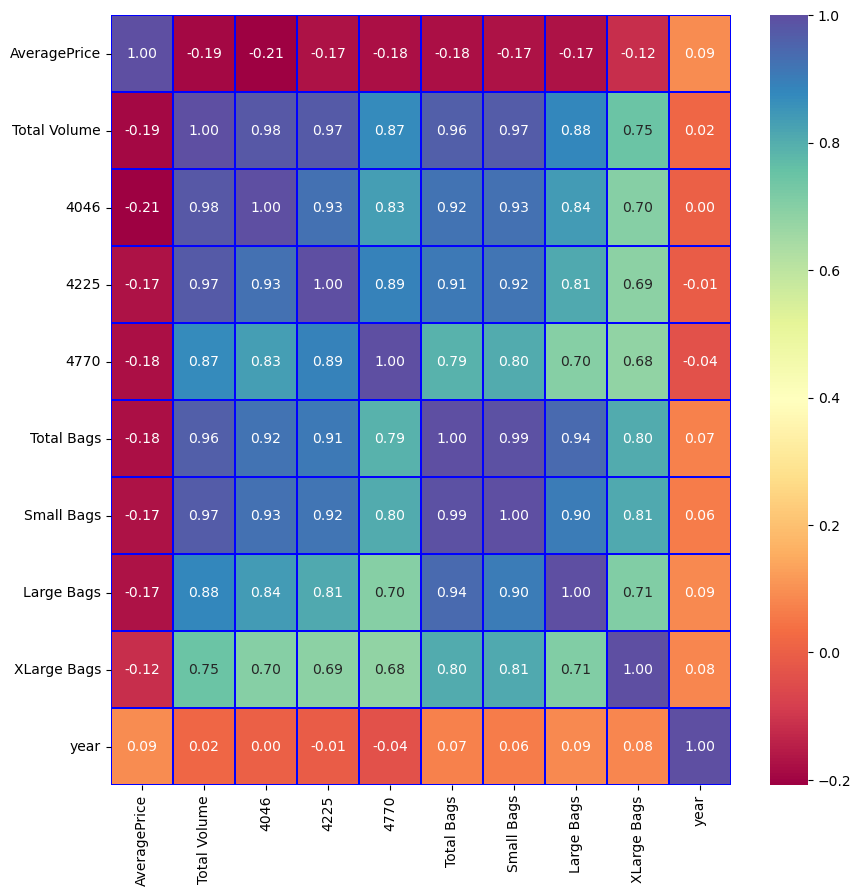

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot =True, fmt ='0.2f', linewidth =0.2, linecolor='blue',cmap= 'Spectral')

In [71]:
from sklearn.preprocessing import LabelEncoder
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [75]:
le= LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])
df.head(20)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,0,2015,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,0,2015,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,0,2015,0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,0,2015,0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,0,2015,0


In [76]:
df.nunique().to_frame('Total Unique values')

,Total Unique values
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588
type,2


In [77]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

In [80]:
# checking for skewness and outliers in dataset

In [81]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

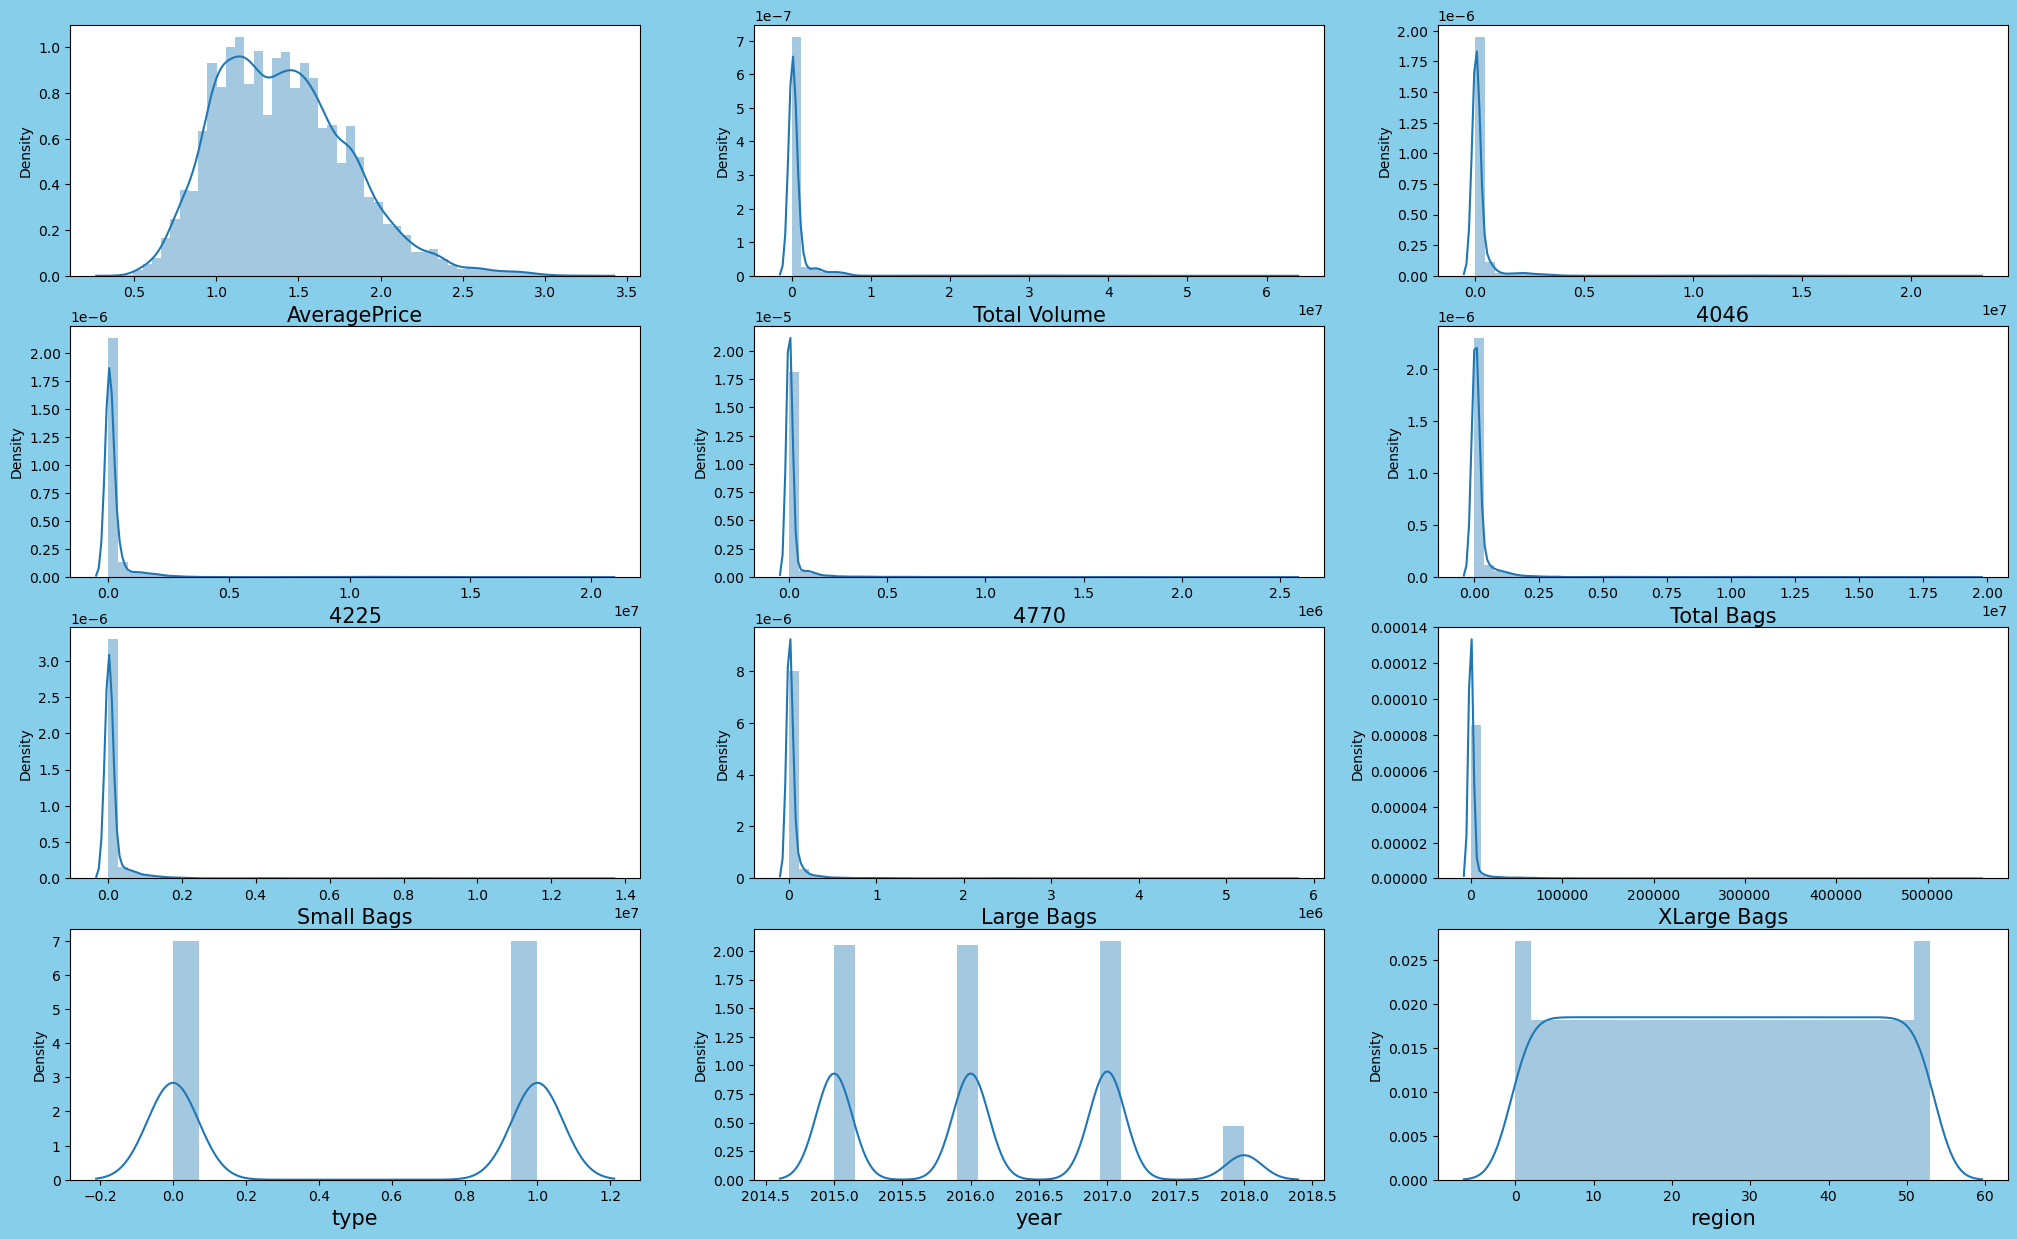

In [83]:
# we will check for data distribution as we know we have skew in our dataset

plt.figure(figsize=(25,15), facecolor = 'skyblue')
p = 1
for x in df:
    if p <=12:
        x1= plt.subplot(4,3,p)
        sns.distplot(df[x])
        plt.xlabel(x,fontsize=15)
        p+=1
plt.show()

In [96]:
#we can see that data is not distrubuted properly
#We will use box cox method to remove skewness as in some of the columns very high skew presetn

In [100]:
from scipy.stats import boxcox
high_skew_cloumns = np.array(df.skew().abs()>0.5)
skew_columns =df.columns[high_skew_cloumns]
constants = {col:abs(df[col].min())+1 for col in skew_columns}
for col in skew_columns:
    constant = constants[col]
    df[col] = df[col].apply(lambda x:x+constant if x<=0 else x)
    transformed_col,_ = boxcox(df[col])
    df[col] = transformed_col
df.skew()

AveragePrice   -0.005592
Total Volume    0.011149
4046           -0.023141
4225           -0.017359
4770            0.033561
Total Bags     -0.001474
Small Bags      0.007324
Large Bags     -0.075118
XLarge Bags     0.803205
type            0.000329
year            0.215339
region          0.000030
dtype: float64

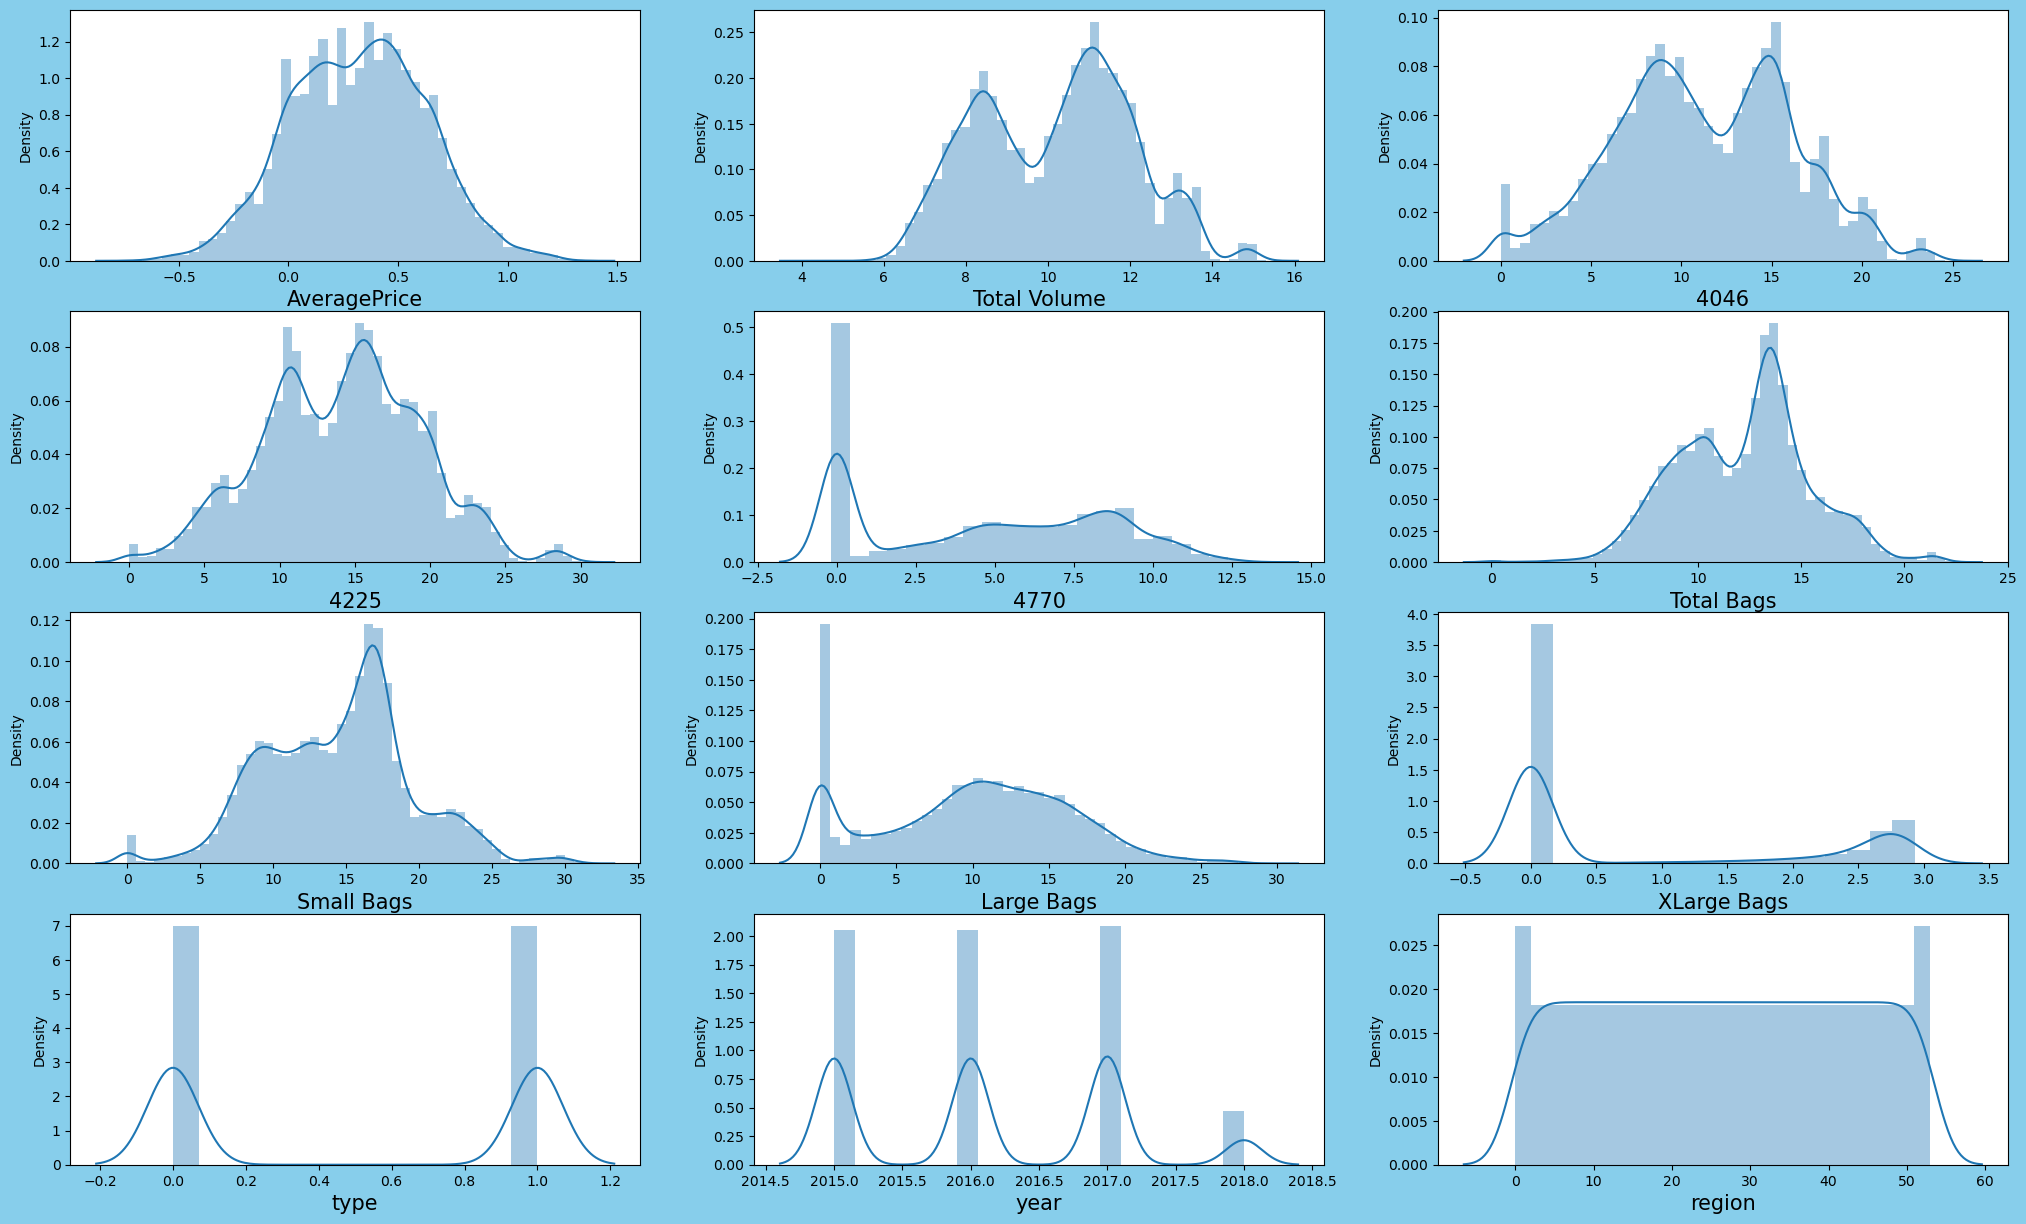

In [101]:
plt.figure(figsize=(25,15), facecolor = 'skyblue')
p = 1
for x in df:
    if p <=12:
        x1= plt.subplot(4,3,p)
        sns.distplot(df[x])
        plt.xlabel(x,fontsize=15)
        p+=1
plt.show()

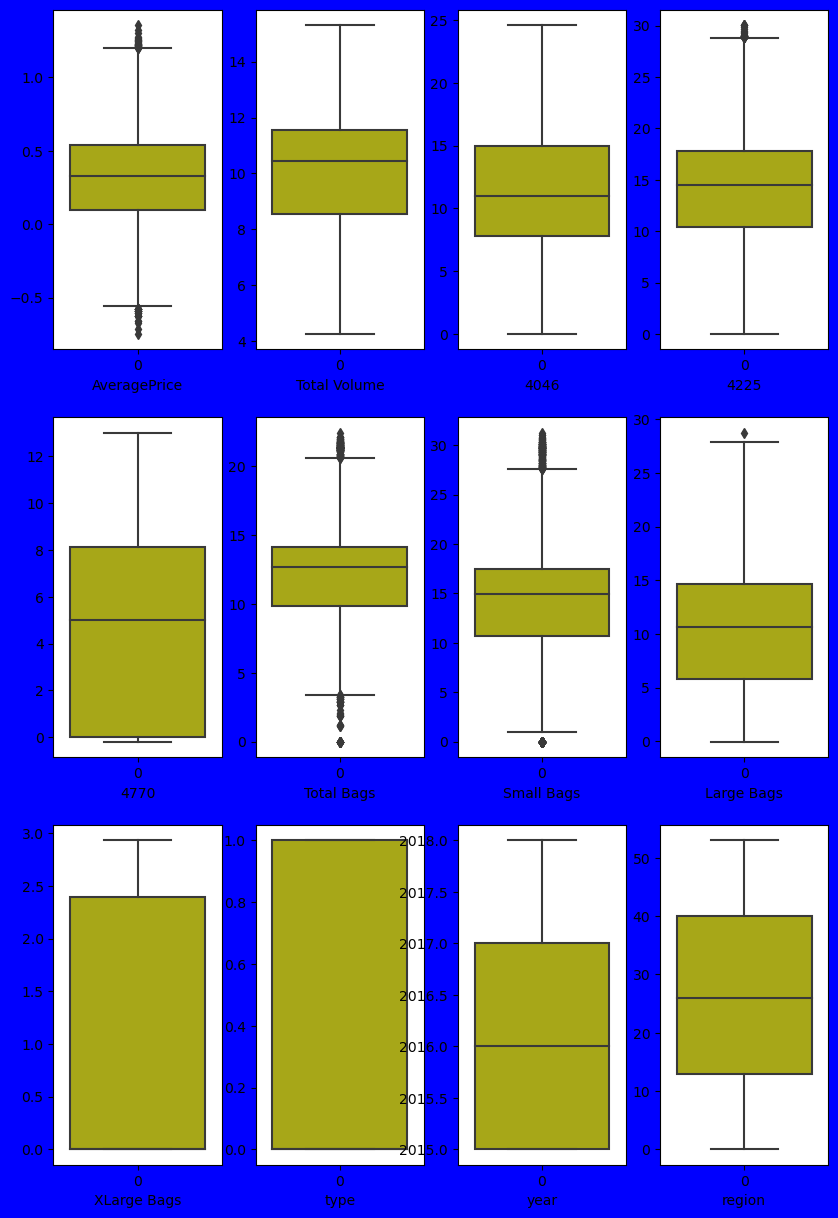

In [103]:
plt.figure(figsize=(10,15), facecolor='blue')
p=1
for i in df.columns:
    if p<=12:
        plt.subplot(3,4, p)
        sns.boxplot(df[i], color='y')
        plt.xlabel(i)
    p+=1
plt.show()

In [105]:
from scipy.stats import zscore
z_score =zscore(df)
z_score

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.083517,-0.086604,-0.656631,0.306351,-0.246693,-0.523993,-0.340604,-0.771927,-0.696744,-0.999836,-1.221282,-1.700252
1,-0.031915,-0.155741,-0.774095,0.230717,-0.199704,-0.485908,-0.306431,-0.761948,-0.696744,-0.999836,-1.221282,-1.700252
2,-1.268123,0.179316,-0.729475,0.578551,-0.003918,-0.551984,-0.366257,-0.749258,-0.696744,-0.999836,-1.221282,-1.700252
3,-0.784968,0.003873,-0.632369,0.414119,-0.146288,-0.695293,-0.496684,-0.690030,-0.696744,-0.999836,-1.221282,-1.700252
4,-0.215175,-0.187634,-0.683131,0.223879,-0.135769,-0.669024,-0.477051,-0.598908,-0.696744,-0.999836,-1.221282,-1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.635374,-0.674555,-0.466543,-0.918074,-1.231530,-0.334590,-0.178943,-0.408747,-0.696744,1.000164,1.970504,1.700811
18245,0.809734,-0.767514,-0.618143,-0.664771,-1.231530,-0.496906,-0.325966,-0.479321,-0.696744,1.000164,1.970504,1.700811
18246,1.140487,-0.771469,-0.618092,-0.771575,0.404887,-0.490966,-0.308731,-0.944037,-0.696744,1.000164,1.970504,1.700811
18247,1.258927,-0.698044,-0.548973,-0.709810,0.404587,-0.424315,-0.248984,-0.908480,-0.696744,1.000164,1.970504,1.700811


In [106]:
ol =(np.abs(z_score)>3).all(axis=1)
df = df[~ol]
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.294870,10.021172,8.048942,15.704275,3.746230,10.576131,12.751261,5.366426,0.0,0,2015,0
1,0.310849,9.892382,7.480016,15.310511,3.924971,10.696283,12.922790,5.428228,0.0,0,2015,0
2,-0.071960,10.516534,7.696128,17.121395,4.669723,10.487823,12.622494,5.506816,0.0,0,2015,0
3,0.077655,10.189714,8.166453,16.265332,4.128159,10.035704,11.967819,5.873619,0.0,0,2015,0
4,0.254100,9.832972,7.920590,15.274912,4.168175,10.118578,12.066365,6.437947,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.517484,8.925925,8.969614,9.329721,0.000000,11.173670,13.562711,7.615633,0.0,1,2018,53
18245,0.571478,8.752758,8.235356,10.648455,0.000000,10.661585,12.824733,7.178563,0.0,1,2018,53
18246,0.673900,8.745391,8.235603,10.092416,6.224778,10.680325,12.911243,4.300533,0.0,1,2018,53
18247,0.710577,8.882169,8.570372,10.413975,6.223638,10.890599,13.211144,4.520737,0.0,1,2018,53


In [108]:
#  now our data is ready to build model
# we will first work on Average price
#we will creat copy of our dataset

In [109]:
df1 = df.copy()

In [110]:
x = df.drop('AveragePrice',axis=1)
y= df['AveragePrice']
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,10.021172,8.048942,15.704275,3.746230,10.576131,12.751261,5.366426,0.0,0,2015,0
1,9.892382,7.480016,15.310511,3.924971,10.696283,12.922790,5.428228,0.0,0,2015,0
2,10.516534,7.696128,17.121395,4.669723,10.487823,12.622494,5.506816,0.0,0,2015,0
3,10.189714,8.166453,16.265332,4.128159,10.035704,11.967819,5.873619,0.0,0,2015,0
4,9.832972,7.920590,15.274912,4.168175,10.118578,12.066365,6.437947,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,8.925925,8.969614,9.329721,0.000000,11.173670,13.562711,7.615633,0.0,1,2018,53
18245,8.752758,8.235356,10.648455,0.000000,10.661585,12.824733,7.178563,0.0,1,2018,53
18246,8.745391,8.235603,10.092416,6.224778,10.680325,12.911243,4.300533,0.0,1,2018,53
18247,8.882169,8.570372,10.413975,6.223638,10.890599,13.211144,4.520737,0.0,1,2018,53


In [111]:
y

0        0.294870
1        0.310849
2       -0.071960
3        0.077655
4        0.254100
           ...   
18244    0.517484
18245    0.571478
18246    0.673900
18247    0.710577
18248    0.510593
Name: AveragePrice, Length: 18249, dtype: float64

In [112]:
# checking VIF

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif = pd.DataFrame()
vif['VIF_values'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF_values,Features
0,1493.746486,Total Volume
1,45.419563,4046
2,89.827320,4225
3,10.272682,4770
4,504.228594,Total Bags
5,143.656146,Small Bags
6,12.672666,Large Bags
7,3.069170,XLarge Bags
8,7.315442,type
9,347.761189,year


In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.08660423, -0.65663105,  0.30635072, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.15574123, -0.77409523,  0.23071651, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [ 0.17931634, -0.72947525,  0.578551  , ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [-0.77146917, -0.61809184, -0.77157505, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.69804418, -0.5489735 , -0.70981007, ...,  1.00016441,
         1.97050371,  1.70081131],
       [-0.66377797, -0.36762291, -0.78421247, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
minMSE = float('inf')

for i in range(1,100):
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =i)
    lr  = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    current_mse = mean_squared_error(y_test,pred)
    
    if current_mse <minMSE:
        minMSE = current_mse
        bestRandomState = i
    print("VAlue of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

VAlue of MSE is  0.04460103725633269  at Random State  1
VAlue of MSE is  0.04460103725633269  at Random State  1
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is  0.042953074639256225  at Random State  3
VAlue of MSE is 

In [126]:
# Linear Regression Model

In [130]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =3)
lr  = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_train)
print('r2 score', r2_score(y_test,pred_lr))
print('r2 score on training data', r2_score(y_train,pred_train))
print('mean absolute error ', mean_absolute_error(y_test,pred_lr))
print('mean square error', mean_squared_error(y_test,pred_lr))
print('root square error', np.sqrt(mean_squared_error(y_test,pred_lr)))
    

r2 score 0.5430917902995265
r2 score on training data 0.5286735572746946
mean absolute error  0.16295461647257695
mean square error 0.042953074639256225
root square error 0.2072512355554394


In [131]:
# Random Forest Regressor

In [132]:
RFR=RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)

print("r_2 score", r2_score(y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_RFR)))

r_2 score 0.8607717628080147
r_2 score on Training Data 0.9788140448052222
Mean Absolute Error: 0.08360242300126144
Mean Square Error: 0.013088582645340935
Root Square Error: 0.1144053436048375


In [133]:
# KNN

In [134]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("r_2 score", r2_score(y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_knn)))

r_2 score 0.8464756670874583
r_2 score on Training Data 0.8971944137852853
Mean Absolute Error: 0.08665063425213061
Mean Square Error: 0.014432531503116033
Root Square Error: 0.12013547146083056


In [135]:
# Gradient Boosting Regressor

In [136]:
gbb=GradientBoostingRegressor()
gbb.fit(x_train, y_train)
pred_gbb=gbb.predict(x_test)
pred_train=gbb.predict(x_train)
print("r_2 score", r2_score(y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_gbb)))


r_2 score 0.6979053480987805
r_2 score on Training Data 0.709283894127136
Mean Absolute Error: 0.12999911677858061
Mean Square Error: 0.028399345548506493
Root Square Error: 0.16852105372476903


In [137]:
#Lasso Regression Model

In [138]:
lasso=Lasso()
lasso.fit(x_train, y_train)
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("r_2 score", r2_score(y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_lasso)))


r_2 score -4.067837567767185e-05
r_2 score on Training Data 0.0
Mean Absolute Error: 0.25071885700054364
Mean Square Error: 0.09401192841057064
Root Square Error: 0.3066136468107228


In [139]:
#Ridge Model

In [140]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("r_2 score", r2_score(y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_rd)))

r_2 score 0.5430918829907491
r_2 score on Training Data 0.5286732854564197
Mean Absolute Error: 0.16295247847467026
Mean Square Error: 0.04295306592553011
Root Square Error: 0.20725121453330522


In [141]:
#Decision Tree Regressor

In [142]:
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("r_2 score", r2_score(y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_dtr)))

r_2 score 0.6988952123578719
r_2 score on Training Data 1.0
Mean Absolute Error: 0.1136273253028196
Mean Square Error: 0.02830629028598153
Root Square Error: 0.16824473330830161


In [143]:
# Difference Between R2 score of Linear Regression and CVS

In [145]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(lr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_lr )- score.mean())

[0.0859574  0.1186606  0.47925679 0.15729295 0.22131377]
0.2124963019305957
Difference between r_2 score and Cross Validation score is 0.33059548836893077


In [146]:
# Difference between R2 score of Random Forest Regression and CVS

In [147]:
score1=cross_val_score(RFR, x, y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_RFR )- score1.mean())

[0.2588764  0.32643604 0.62373189 0.25169811 0.07407195]
0.30696287721110693
Difference between r_2 score and Cross Validation score is 0.5538088855969078


In [148]:
# Difference between R2 score of KNN and CVS

In [149]:
score2=cross_val_score(knn, x, y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_knn )- score2.mean())

[-0.04848494  0.28998552  0.45424054  0.26932659 -0.12846238]
0.16732106390835286
Difference between r_2 score and Cross Validation score is 0.6791546031791054


In [150]:
#Difference between R2 score of Gradient Boost and CVS

In [151]:
score3=cross_val_score(gbb, x, y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_gbb )- score3.mean())

[0.35232128 0.41110038 0.59422345 0.33166752 0.198975  ]
0.3776575247020295
Difference between r_2 score and Cross Validation score is 0.32024782339675095


In [152]:
# Difference between R2 of Lasso and CVS

In [153]:
score4=cross_val_score(lasso, x, y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_lasso )- score4.mean())

[-2.71832167 -0.58201359 -0.0242671  -0.60965076 -0.96126606]
-0.9791038362087374
Difference between r_2 score and Cross Validation score is 0.9790631578330597


In [154]:
# Difference of R2 score of Ridge model and CVS

In [155]:
score5=cross_val_score(rd, x, y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_lasso )- score5.mean())

[0.08565236 0.11867025 0.47925439 0.15785447 0.22122464]
0.21253122096588523
Difference between r_2 score and Cross Validation score is -0.2125718993415629


In [156]:
# Difference of R2 score of Decession Tree Regressor and CVS

In [157]:
score6=cross_val_score(dtr, x, y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(y_test,pred_dtr )- score6.mean())

[-0.63293044 -0.16836469  0.26480627 -0.46110071 -0.34978727]
-0.2694753667832086
Difference between r_2 score and Cross Validation score is 0.9683705791410805


In [158]:
# So from above results we can see that Ridge Regression has difference of -0.212, which is very low in compare with 
# all other model so we will go with Ridge model

In [159]:
#Grid Search CV 

In [160]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
rd = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(rd, param_grid, scoring=make_scorer(r2_score), cv=5)
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_train, y_train)
pred_ridge = best_ridge_model.predict(x_test)
print("Best alpha:", best_alpha) # Evaluation of the model
print("R-squared score on test set:", r2_score(y_test, pred_ridge))

Best alpha: 0.1
R-squared score on test set: 0.543091825051682


In [162]:
rd=Ridge(alpha=best_alpha)
final_model=rd.fit(x_train,y_train)
pred_finally=final_model.predict(x_test)
print("r_2 score", r2_score(y_test,pred_finally ))
print("Mean Absolute Error:", mean_absolute_error(y_test,pred_finally ))
print("Mean Square Error:", mean_squared_error(y_test,pred_finally))
print("Root Square Error:", np.sqrt(mean_squared_error(y_test,pred_finally)))

r_2 score 0.543091825051682
Mean Absolute Error: 0.1629544025463808
Mean Square Error: 0.04295307137227197
Root Square Error: 0.20725122767373894


In [163]:
# Saving model

In [164]:
import joblib
joblib.dump(final_model,' Avocado_project.pkl')

[' Avocado_project.pkl']

In [165]:
#Prediction

In [166]:
prediction = final_model.predict(x_test)
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted_Values"] = prediction
df_Pred["Actual_Values"] = Actual
df_Pred.head()

,Predicted_Values,Actual_Values
0,0.146922,0.262350
1,0.699132,0.710577
2,0.357713,0.380586
3,0.108596,0.254100
4,0.184120,0.286811
